In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage as ndimage

In [2]:
face = cv.imread("face.jpg", 0)
tower = cv.imread("eiffel.jpg", 0)
foggy = cv.imread("lapland.jpg",0)

In [3]:
def show_image(image, title="Title"):
    plt.imshow(image, cmap="gray")
    plt.title(title)
    plt.axis('off')

In [4]:
def get_t(image): # Calculate the Canny thresholds based on the median
    median = np.median(image.flatten())
    minT = median * 0.67
    maxT = median * 1.33
    return minT, maxT

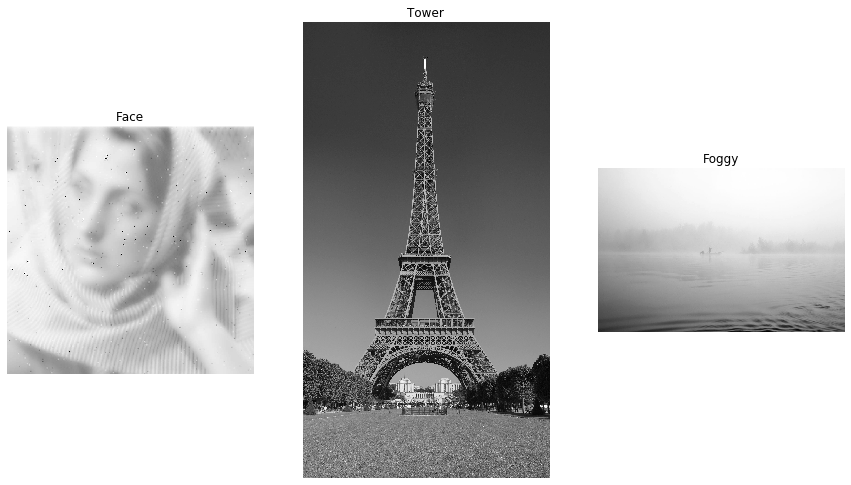

In [5]:
fig = plt.figure(figsize=(15,15))
row = 1
col = 3
fig.add_subplot(row, col, 1)
show_image(face, "Face")
fig.add_subplot(row, col, 2)
show_image(tower, "Tower")
fig.add_subplot(row, col, 3)
show_image(foggy, "Foggy")

## 1. An edge with clear images and one without

The images I decided to go with were the Eiffel tower and an image of a foggy lake in Lapland.

In [6]:
tower_minT, tower_maxT  = get_t(tower)
print("maxT: " + str(tower_maxT))
print("minT: " + str(tower_minT))

maxT: 113.05000000000001
minT: 56.95


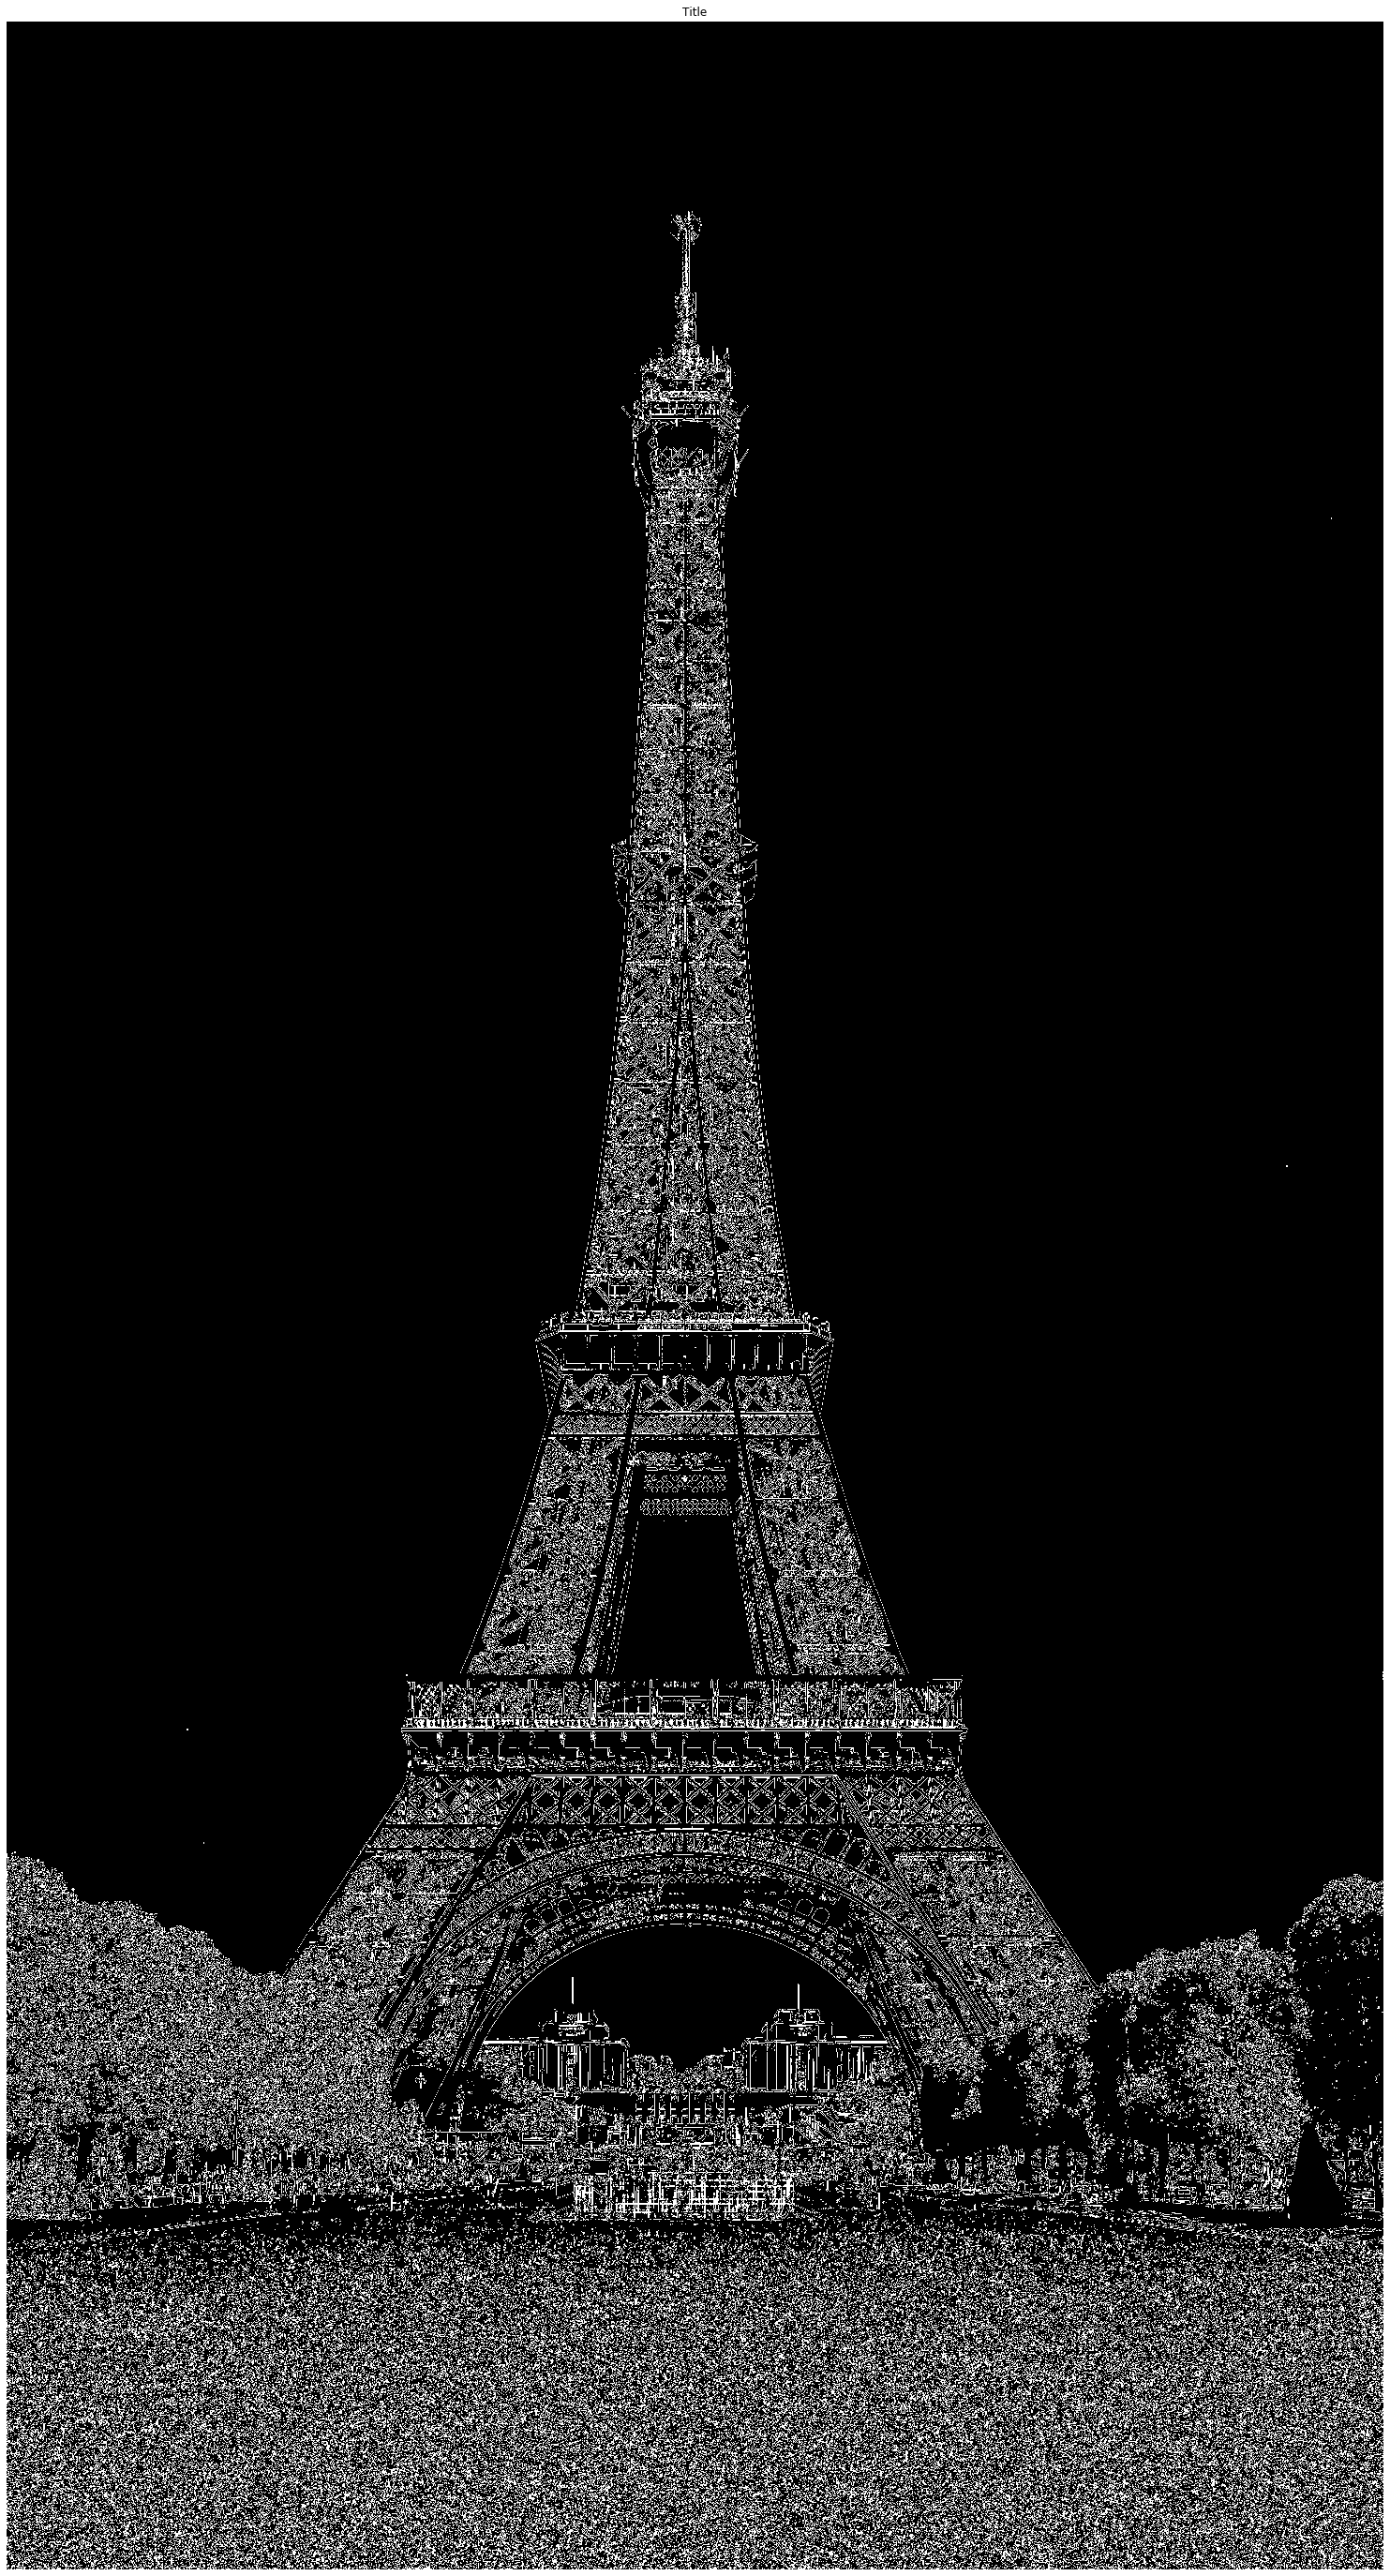

In [7]:
canny_tower = cv.Canny(tower,tower_minT,tower_maxT)
plt.figure(figsize=(50,50))
show_image(canny_tower)

This is the edge detected image when we apply the thresholds that are calculated automatically based on the median. Obviously a lot o the grass at the bottom of the image is detected however with some optimization of the threshold values this can be dropped. 

The tower as a whole is detected well. The image is a bit too large to see the details well enough however, if you zoom in you can see more of the detailed edges that the canny has picked out.

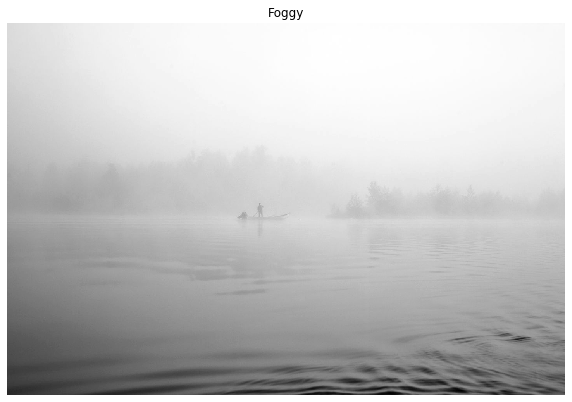

In [8]:
plt.figure(figsize=(10,10))
show_image(foggy, "Foggy")

This image, to the human eye, has pretty clear edges. It's easy to see the edge between the water and the forest on the left side, and the bushes on the right. The same goes for the edge from the top of the tress and bushes towards the fog.

In [9]:
foggy_minT, foggy_maxT  = get_t(foggy)
print("MinT: " + str(foggy_minT))
print("MaxT: " + str(foggy_maxT))

MinT: 128.64000000000001
MaxT: 255.36


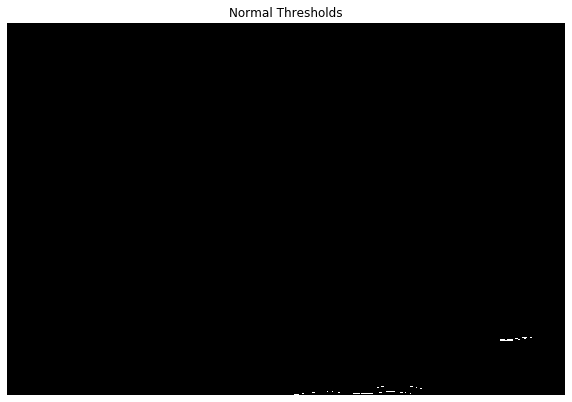

In [10]:
unclear = cv.Canny(foggy,foggy_minT,foggy_maxT)
plt.figure(figsize=(10,10))
show_image(unclear, "Normal Thresholds")

For this image the automatically calculated threshold values based on the median do not work at all.

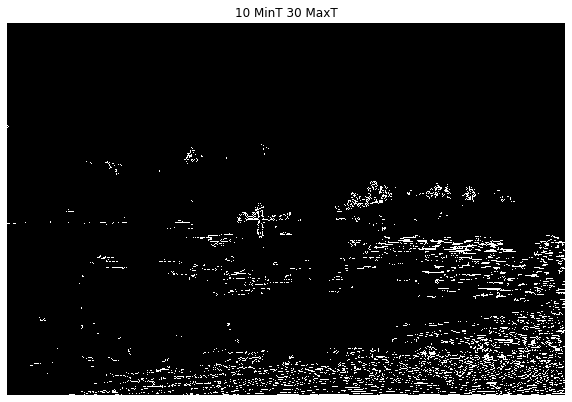

In [11]:
unclear = cv.Canny(foggy,10,30)
plt.figure(figsize=(10,10))
show_image(unclear, "10 MinT 30 MaxT")

With a MinT at around 10-20 and a MaxT around 30, this is the end result. As we can see, the edge detector has not really managed to discern the edge between the water and the trees and bushes well at all.

Neither dose it find the edge towards the fog on the top of the trees that well. It finds something however that it is easy to see that this is an image where it struggles to find the edges.

As seen in the picture below as well, going even lower on the threshold values simply introduces more edges in the water. There is some improvement to the edges on the trees, however it still isn't a complete edge.

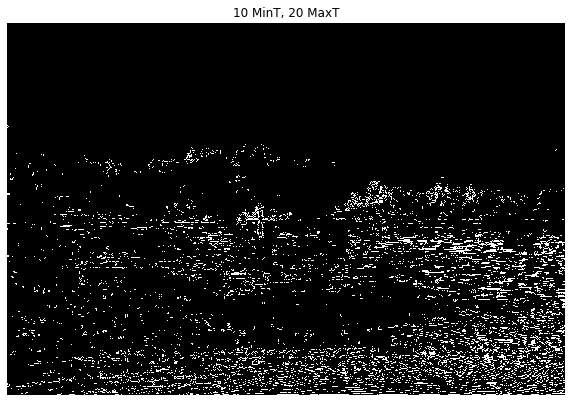

In [12]:
unclear = cv.Canny(foggy,10,20)
plt.figure(figsize=(10,10))
show_image(unclear, "10 MinT, 20 MaxT")

## 2. Edge detection on face.jpg

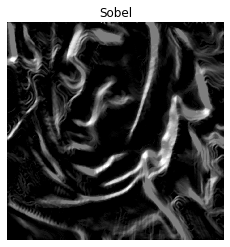

In [13]:
sobel = cv.imread("sobel.jpg", 0)
show_image(sobel, "Sobel")

Same functions that I used in the sobel edge enhancement assignment.

In [14]:
# Laplacian
def laplacian_filter(image):
    laplace_kernel = np.array([[0,-1,0],[-1,5,-1],[0,-1,0]])
    filtered = cv.filter2D(image, -1, laplace_kernel)
    plt.imshow(filtered, cmap='gray')
    plt.title("Laplacian")
    plt.axis('off')
    plt.show()
    return filtered

# Median
def median_filter(image, x=3):
    filtered = cv.medianBlur(image, x)
    plt.imshow(filtered, cmap='gray')
    plt.title( "Median {x}x{x}".format(x=str(x)))
    plt.axis('off')
    plt.show()
    return filtered

# Gaussian
def gaussian_filter(image, sig=4):
    filtered = ndimage.gaussian_filter(image, sigma=sig)
    plt.imshow(filtered, cmap='gray')
    plt.title( "Gaussian sigma={x}".format(x=str(sig)))
    plt.axis('off')
    plt.show()
    return filtered

# High boost
def hp_filter(image, a=1.1):
    c = 9 * a - 1
    highboost_kernel = np.array([[-1,-1,-1],[-1,c, -1],[-1,-1,-1]])
    filtered = cv.filter2D(image, -1, highboost_kernel)
    plt.imshow(filtered, cmap='gray')
    plt.title( "Highpass x={x}".format(x=str(a)))
    plt.axis('off')
    plt.show()
    return filtered

# Adding together two images
def sum_image(image_1, image_2):
    image = image_1 + image_2
    #image = cv.add(image_1, image_2)
    plt.imshow(image, cmap='gray')
    plt.title( "Sum of two imagse")
    plt.axis('off')
    plt.show()
    return image

# Sobel filtering
def sobel_filter(image, k=3):
    sobel_h = cv.Sobel(image, -1, dx=1, dy=0, ksize=k)
    sobel_v = cv.Sobel(image, -1, dx=0, dy=1, ksize=k)
    final = cv.addWeighted(sobel_h, 0.5, sobel_v, 0.5, -1)
    plt.imshow(final, cmap='gray')
    plt.title("Sobel")
    plt.axis('off')
    plt.show()
    return final

def hist_equalize(image):
    #image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    filtered = cv.equalizeHist(image)
    plt.imshow(filtered, cmap='gray')
    plt.title("Histogram equalized")
    plt.axis('off')
    plt.show()
    filtered = cv.cvtColor(filtered, cv.COLOR_GRAY2BGR)
    return filtered

def canny_detect(image, minT=50, maxT=150):
    filtered = cv.Canny(image, minT, maxT)
    plt.imshow(filtered, cmap='gray')
    plt.title("Canny edge detection")
    plt.axis('off')
    plt.show()
    return filtered

I'll start by simply doing what I did to get my sobel result, which was:
median -> laplacian -> histogram equalization -> highpass filter -> gaussian filter
At this point I obviously change the order up since I need to do a canny edge detection instead of a Sobel.

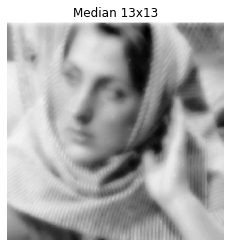

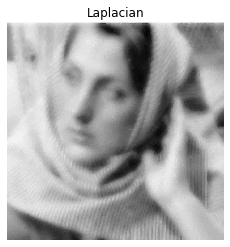

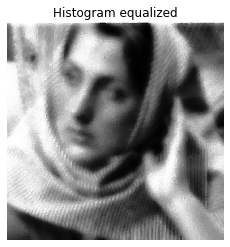

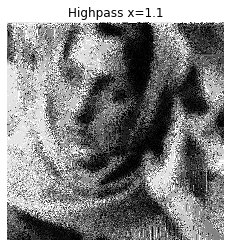

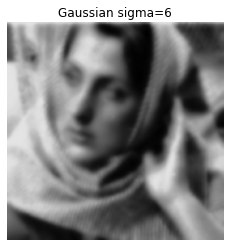

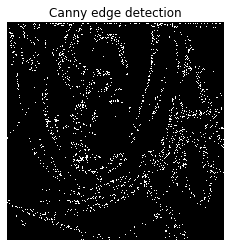

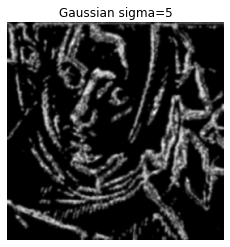

In [15]:
median = median_filter(face, x=13)
laplacian = laplacian_filter(median)
hi = hist_equalize(laplacian)
hp = hp_filter(hi)
gauss2 = gaussian_filter(hp, sig=6)
f_minT, f_maxT = get_t(gauss2)
canny = canny_detect(gauss2, 14, 17)
smooth = gaussian_filter(canny, sig=5)

The same order worked out pretty well for Sobel and Canny edge detection. In this specific instance however the unsmoothed Canny was a lot worse compared to the unsmoothed Sobel edge detection.

To make the edges clearer I simply applied a gaussian filter which created a decent end result.

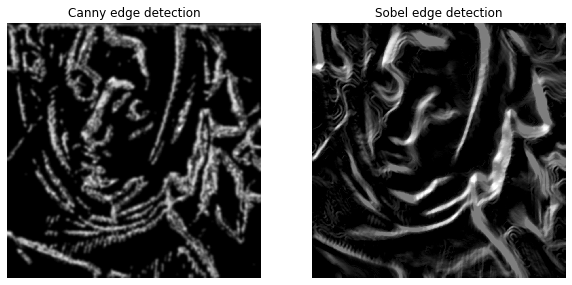

In [16]:
fig = plt.figure(figsize=(10,10))
fig.add_subplot(1,2,1)
plt.title("Canny edge detection")
plt.axis('off')
plt.imshow(smooth, cmap='gray')


fig.add_subplot(1,2,2)
plt.title("Sobel edge detection")
plt.axis('off')
plt.imshow(sobel, cmap='gray')

plt.show()

This is the final result; and the comparison between the two in my case. I think that they (obviously) have their similarities, but I do think that the Canny edge detection is slightly better at highlighting the face. The nose especially seems a lot better in the Canny edge version.